In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
home_directory_path = os.path.expanduser('~')
sys.path.append(home_directory_path +'/utils')
from prepare_utils import split_data

import wrangle

import sklearn.preprocessing

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [2]:
df = wrangle.wrangle_zillow_data()

Before I scale, I want to split the data:
- First, I will split 70/15/15 since my data is large.

In [3]:
train, _, _ = split_data(df, test_size=.15, validate_size=.15, random_state=125)
train.head(3)

,bedrooms,bathrooms,sqft,property_value,year_built,property_tax,county
1778925,2,2.0,936,91765,1985,1100.13,LA
906496,4,2.0,1680,101431,1958,1405.06,LA
2065060,4,2.0,1876,76885,1965,1387.54,Orange


In [4]:
y_train = train['property_value']
X_train = train.drop('property_value', axis=1)
X_train_num = train[['bedrooms','bathrooms','sqft','year_built','property_tax']]

In [17]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
standard_scaler = sklearn.preprocessing.StandardScaler()
robust_scaler = sklearn.preprocessing.RobustScaler()

In [18]:
min_max_scaler.fit(X_train_num)
standard_scaler.fit(X_train_num)
robust_scaler.fit(X_train_num)

train_mm_scaled = min_max_scaler.transform(X_train_num)
train_st_scaled = standard_scaler.transform(X_train_num)
train_rb_scaled = robust_scaler.transform(X_train_num)

In [25]:
train_rb_scaled

array([[-1.        ,  0.        , -0.73615635,  1.03846154, -0.79309954],
       [ 1.        ,  0.        ,  0.07166124,  0.        , -0.71171336],
       [ 1.        ,  0.        ,  0.2844734 ,  0.26923077, -0.71638947],
       ...,
       [-1.        , -1.        , -0.47557003, -1.42307692, -0.19156832],
       [ 0.        ,  0.        , -0.51031488,  0.23076923,  0.24750014],
       [ 1.        ,  1.        ,  0.10423453, -0.11538462, -0.77148855]])

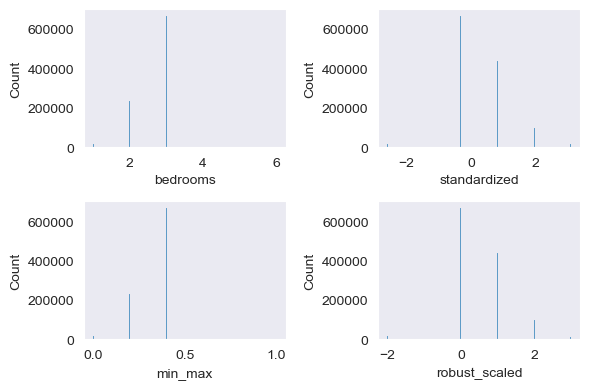

----------------------------------------


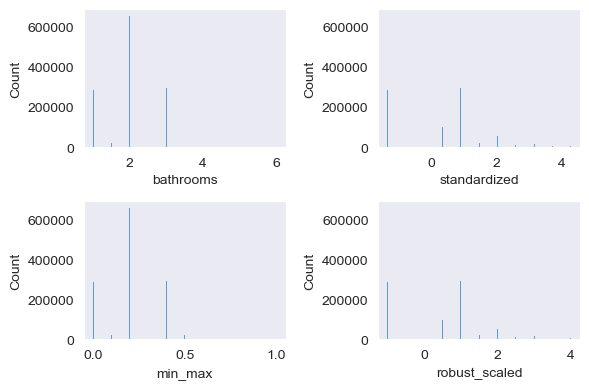

----------------------------------------


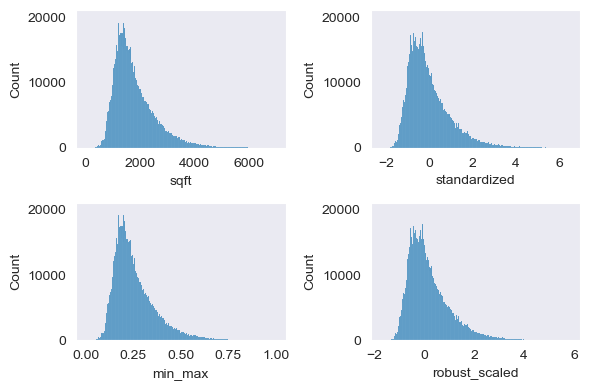

----------------------------------------


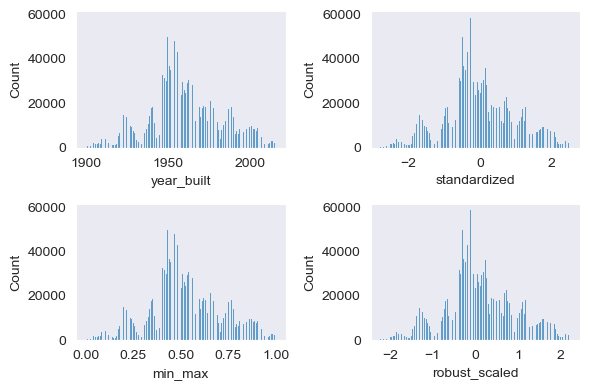

----------------------------------------


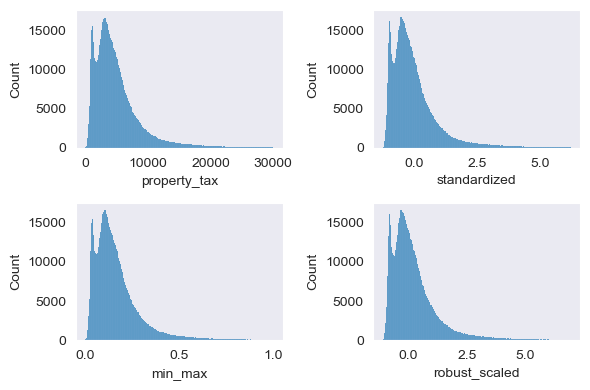

----------------------------------------


In [35]:
for i, col in enumerate(X_train_num.columns):
    sns.set_style('dark')
    fig, axes = plt.subplots(2, 2, figsize=(6, 4))
    
    sns.histplot(X_train_num, x=col, ax=axes[0,0])
    sns.histplot(train_mm_scaled[:,i], ax=axes[1,0])
    axes[1,0].set_xlabel('min_max')
    sns.histplot(train_st_scaled[:,i], ax=axes[0,1])
    axes[0,1].set_xlabel('standardized')
    sns.histplot(train_rb_scaled[:,i], ax=axes[1,1])
    axes[1,1].set_xlabel('robust_scaled')
    plt.tight_layout()
    plt.show()
    print('-'*40)

2. Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?

In [ ]:
train_mm_scaled = min_max_scaler.inver(X_train_num)
train_st_scaled = standard_scaler.transform(X_train_num)
train_rb_scaled = robust_scaler.transform(X_train_num)

3. Read the documentation for sklearn's `QuantileTransformer`. Use `normal` for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.

4. Use the `QuantileTransformer`, but omit the `output_distribution` argument. Visualize your results. What do you notice?

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your `prepare.py` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!